In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | shiraz
Processing Record 7 of Set 1 | nanning
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | zalantun
Processing Record 11 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | peleduy
Processing Record 14 of Set 1 | comodoro rivadavia
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | abu dhabi
Processing Record 17 of Set 1 | plettenberg bay
Processing Record 18 of Set 1 | hervey bay
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | coahuayana


Processing Record 36 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | kenai
Processing Record 39 of Set 4 | tongchuan
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | sao felix do xingu
Processing Record 43 of Set 4 | ouidah
Processing Record 44 of Set 4 | sungaipenuh
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | wadena
Processing Record 47 of Set 4 | lamu
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | belaya gora
Processing Record 50 of Set 4 | souillac
Processing Record 1 of Set 5 | biu
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | male
Processing Record 5 of Set 5 | alta
Processing Record 6 of Set 5 | balikpapan
Processing Record 7 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 8 o

Processing Record 24 of Set 8 | medveditskiy
Processing Record 25 of Set 8 | severo-kurilsk
Processing Record 26 of Set 8 | labuhan
Processing Record 27 of Set 8 | makakilo city
Processing Record 28 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 8 | the valley
Processing Record 30 of Set 8 | requena
Processing Record 31 of Set 8 | rundu
Processing Record 32 of Set 8 | abu zabad
Processing Record 33 of Set 8 | lakeway
Processing Record 34 of Set 8 | hithadhoo
Processing Record 35 of Set 8 | caraz
Processing Record 36 of Set 8 | epe
Processing Record 37 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 38 of Set 8 | teodoro sampaio
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | limulunga
Processing Record 41 of Set 8 | schwechat
Processing Record 42 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 43 of Set 8 | caohe
Processing Record 44 of Set 8 | deh rawud
City not found. Skipping...
Processing Rec

Processing Record 11 of Set 12 | posse
Processing Record 12 of Set 12 | torzhok
Processing Record 13 of Set 12 | sivas
Processing Record 14 of Set 12 | kieta
Processing Record 15 of Set 12 | kodinsk
Processing Record 16 of Set 12 | kikwit
Processing Record 17 of Set 12 | gamba
Processing Record 18 of Set 12 | garissa
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 21 of Set 12 | acari
Processing Record 22 of Set 12 | sioux lookout
Processing Record 23 of Set 12 | yenagoa
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | sulurpeta
City not found. Skipping...
Processing Record 27 of Set 12 | mwinilunga
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | chikwawa
Processing Record 30 of Set 12 | ashitkovo
Processing Record 31 of Set 12 | longlac
City not found. Skipping...
Processing Record 32 of Set 12 | stoyba
City not f

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.99,98,85,4.00,NZ,2021-04-21 21:31:39
1,Rikitea,-23.1203,-134.9692,78.26,71,13,11.01,PF,2021-04-21 21:32:35
2,Ushuaia,-54.8000,-68.3000,48.20,49,0,1.34,AR,2021-04-21 21:28:24
3,Tuktoyaktuk,69.4541,-133.0374,10.40,79,75,25.32,CA,2021-04-21 21:32:36
4,Kodiak,57.7900,-152.4072,41.00,93,90,14.97,US,2021-04-21 21:32:36
5,Shiraz,29.6036,52.5388,73.40,28,20,9.22,IR,2021-04-21 21:32:36
6,Nanning,22.8167,108.3167,75.20,94,75,4.47,CN,2021-04-21 21:32:37
7,Cape Town,-33.9258,18.4232,64.99,77,0,5.75,ZA,2021-04-21 21:27:49
8,Dingle,10.9995,122.6711,77.99,82,99,7.76,PH,2021-04-21 21:32:37
9,Zalantun,48.0000,122.7167,55.36,50,98,7.29,CN,2021-04-21 21:32:38


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
                    
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-04-21 21:31:39,-46.1927,168.8643,48.99,98,85,4.00
1,Rikitea,PF,2021-04-21 21:32:35,-23.1203,-134.9692,78.26,71,13,11.01
2,Ushuaia,AR,2021-04-21 21:28:24,-54.8000,-68.3000,48.20,49,0,1.34
3,Tuktoyaktuk,CA,2021-04-21 21:32:36,69.4541,-133.0374,10.40,79,75,25.32
4,Kodiak,US,2021-04-21 21:32:36,57.7900,-152.4072,41.00,93,90,14.97
...,...,...,...,...,...,...,...,...,...
558,Muriwai Beach,NZ,2021-04-21 21:36:21,-36.8167,174.4500,64.00,77,86,7.70
559,Nautla,MX,2021-04-21 21:36:22,20.2167,-96.7833,77.88,74,52,12.15
560,Leh,IN,2021-04-21 21:36:22,34.1667,77.5833,30.38,94,100,5.35
561,Amot,NO,2021-04-21 21:36:23,59.5714,7.9877,39.99,51,3,1.01


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [13]:
# Extract relevant fields from th eDataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

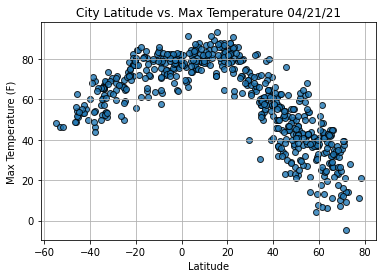

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

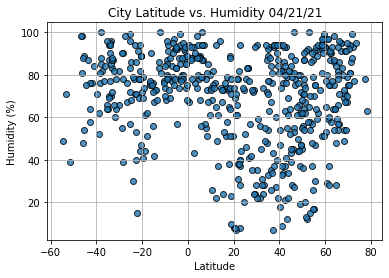

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

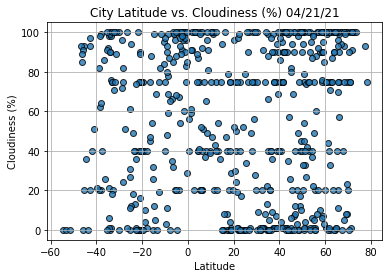

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

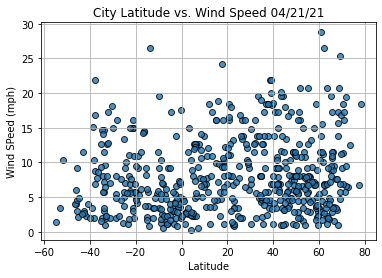

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind SPeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()